In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Information from thefouriertransform.com

# The Fourier Series

A function is periodic with a period of T if the following is true for all values of t:

$$f(t+T) = f(t)$$

A Fourier series decomposes any periodic function into the sums of sinusoidal functions. It is given by the function below:

$$g(t) = a_{0} + \sum_{m=1}^{\infty}a_{m}\cos\bigg(\frac{2\pi mt}{T}\bigg) + \sum_{n=1}^{\infty}b_{n}\sin\bigg(\frac{2\pi nt}{T}\bigg)$$

$$ = \sum_{m=0}^{\infty}a_{m}\cos\bigg(\frac{2\pi mt}{T}\bigg) + \sum_{n=1}^{\infty}b_{n}\sin\bigg(\frac{2\pi nt}{T}\bigg),$$

where every component sinusoid has some coefficient that scales its contribution and a frequency that is some multiple of 1/T. This means that every component must repeat an integer number of times within the period of the total waveform.

> ##### <font color="red"> QUESTION: Why does the cosine term start from 0?
> One has to be able to shift the entire function up or down by whatever constant values they choose. When $m = 0$, $\cos(\frac{2\pi mt}{T}) = 1$, so we are just left with some constant $a_{0}$ that can shift the function up and down.

</font>

Now let's look at the accuracy of Fourier approximations based on the number of terms, starting with the one-term approximation, $g(t) = a_0$. 

The optimal value for the $a_0$ is one that satisfies the following condition, which finds the average value over the interval:

$$a_0 = \frac{1}{T}\int_0^Tf(t)dt$$

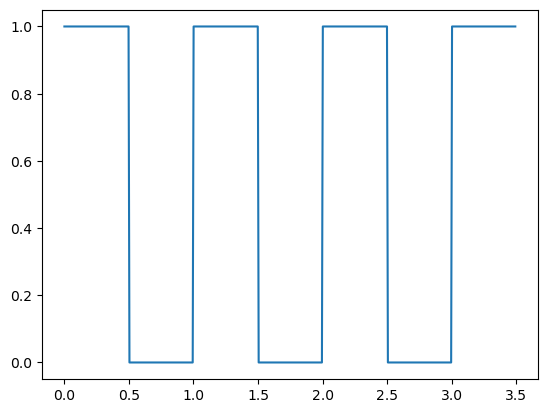

In [2]:
t = np.linspace(0, 3.5, 500, endpoint=False)
square_wave = 0.5 + 0.5*signal.square(2 * np.pi * t)
plt.plot(t, square_wave)
plt.show()

For the square wave shown above, the average is $0.5$, so $a_0 = 0.5$.

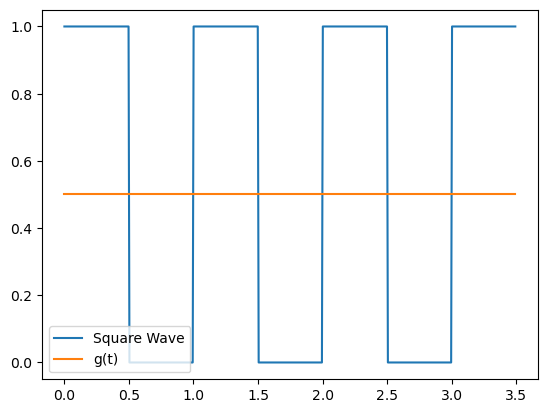

In [3]:
one_term_approx = np.ones_like(square_wave) * 0.5
plt.plot(t, square_wave, label="Square Wave")
plt.plot(t, one_term_approx, label="g(t)")
plt.legend()
plt.show()

The two-term approximation would be the following:

$$g(t) = a_0 + b_1\sin\bigg(\frac{2\pi t}{T}\bigg)$$

where

$$b_1 = \frac{2}{T} \int_0^T f(t) \sin\bigg(\frac{2\pi t}{T}\bigg)dt$$

After solving this this integral for a square wave (appendix A), we find that

$$b_1 = \frac{2}{\pi}$$

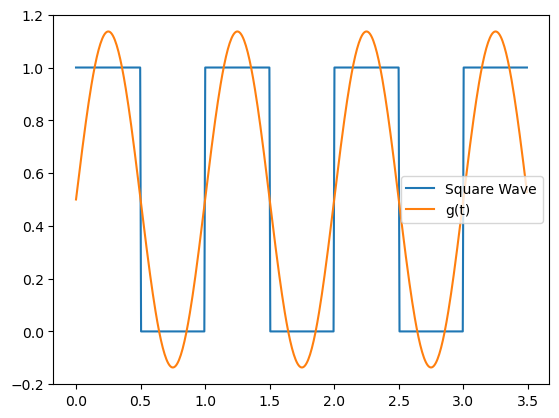

In [5]:
def b_1(t):
    return 2/np.pi * np.sin(2*np.pi*t) # Period (T) = 1

two_term_approx = one_term_approx + b_1(t)

plt.plot(t, square_wave, label="Square Wave")
plt.plot(t, two_term_approx, label="g(t)")
plt.legend()
plt.show()

Here are the generalized formulas for all terms in the Fourier series:

$$a_0 = \frac{1}{T}\int_0^Tf(t)dt$$

$$a_m = \frac{2}{T} \int_0^T f(t) \cos\bigg(\frac{2\pi m t}{T}\bigg)dt$$

$$b_n = \frac{2}{T} \int_0^T f(t) \sin\bigg(\frac{2\pi n t}{T}\bigg)dt$$

The solutions of these integrals follow a pattern:

$$a_0 = \frac{1}{2}$$

$$a_m = 0$$

$$b_n = \left\{
\begin{array}{ll}
    \frac{2}{\pi n}, n \text{ odd} \\ \\
    0, n \text{ even}
\end{array}
\right.$$

The $a_m$ coefficients never make a contribution because cosine is an even function, while the square wave function is odd.


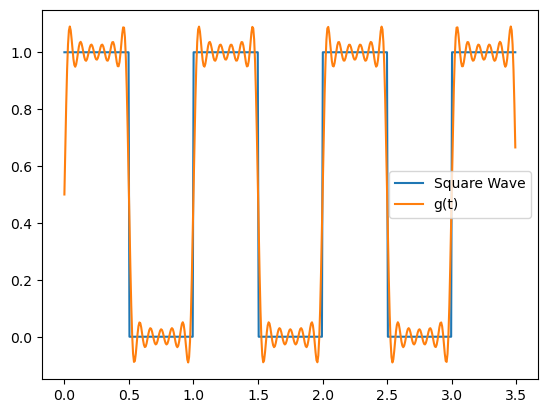

In [10]:
def seven_term_approx(a_0,t):
    wave_approx = np.zeros_like(t)
    for i in range(1,13,2):
        wave_approx += 2/(np.pi*i) * np.sin(2*np.pi*i*t)
    return wave_approx + a_0

wave_approx = seven_term_approx(0.5,t)

plt.plot(t,square_wave,label='Square Wave')
plt.plot(t,wave_approx,label='g(t)')
plt.legend()
plt.show()

In [7]:
for i in range(1,13,2):
    print(i)

1
3
5
7
9
11


##### Appendix A: Calculation of $b_1$ for a square wave $f(t)$.

$$ f(t)=    \left\{
\begin{array}{ll}
      1, & 0<t<\frac{T}{2} \\
      0, & \frac{T}{2}<t<T \\
\end{array}
\right.  $$

<br>

$$\begin{align*}
b_1 &= \frac{2}{T} \int_0^T f(t) \sin\bigg(\frac{2\pi t}{T}\bigg)dt \\
&= \frac{2}{T} \bigg(\int_0^{\frac{T}{2}} 1 \sin\bigg(\frac{2\pi t}{T}\bigg)dt + \int_{\frac{T}{2}}^{T} 0 \sin\bigg(\frac{2\pi t}{T}\bigg)dt\bigg) \\
&= \frac{2}{T} \int_0^{\frac{T}{2}} \sin\bigg(\frac{2\pi t}{T}\bigg)dt
\end{align*}
$$

<br>

$$\int \sin\bigg(\frac{2\pi t}{T}\bigg)dt$$

$$u = \frac{2\pi t}{T}$$

$$du = \frac{2\pi}{T} dt$$

$$\begin{align*}
&= \frac{T}{2\pi} \int \sin(u)du \\
&= -\frac{T}{2\pi} \cos(u)
\end{align*}$$

so

$$\begin{align*}
\frac{2}{T} \int_0^{\frac{T}{2}} \sin\bigg(\frac{2\pi t}{T}\bigg)dt &= \frac{2}{T} \bigg(-\frac{T}{2\pi}\cos\bigg(\frac{2\pi t}{T}\bigg)\bigg|_0^{\frac{T}{2}}\bigg) \\

&= \frac{2}{T}\bigg(-\frac{T}{2\pi}\cos\bigg(\frac{2\pi \frac{T}{2}}{T}\bigg) - -\frac{T}{2\pi}\cos\bigg(\frac{2\pi 0}{T}\bigg)\bigg) \\

&= \frac{2}{T}\bigg(-\frac{T}{2\pi}\cos(\pi) +\frac{T}{2\pi}\cos(0)\bigg) \\

&= \frac{2}{T} \bigg(\frac{T}{2\pi} + \frac{T}{2\pi}\bigg) \\

&= \frac{2}{T} \bigg(\frac{T}{\pi}\bigg) \\

&= \frac{2}{\pi}
\end{align*}$$
